## Grid-Search Univariate LSTM-RNN Sumatera Selatan Percobaan 1

### 1. Declaration Library

In [1]:
# library manipulation dataset
import pandas as pd
from pandas import concat
from pandas import DataFrame
from pandas import read_csv
from pandas import read_excel

# library manipulation array
import numpy as np
from numpy import concatenate
from numpy import array

# library configuration date and time
import time
from datetime import datetime

# library data visualization
import seaborn as sns
from matplotlib import pyplot
from matplotlib import pyplot as plt

# library analysis acf and pacf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# library normalize data with max-min algorithm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# library algorithm lstm-rnn with keras
import tensorflow as tf
from tensorflow.keras import models
from keras.models import Sequential
from keras.layers import RNN
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.optimizers import Adam, Adamax, RMSprop, SGD

# Early stoping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# library evaluation model
from math import sqrt
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### 2. Akuisisi Data

In [2]:
# set time for complexity computation
start = time.time()

In [3]:
# fix random seed for reproducibility
np.random.seed(1234)

In [4]:
# load dataset csv
dataset = pd.read_csv("dataset/modis_sumsel_bulanan.csv", parse_dates=['acq_date'], engine="python")

In [5]:
# # set index
# dataset = dataset.set_index("Date");

In [6]:
# show metadata dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  240 non-null    datetime64[ns]
 1   hotspot   240 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


In [7]:
# show dataset
dataset

,acq_date,hotspot
0,2001-01-31,3
1,2001-02-28,5
2,2001-03-31,10
3,2001-04-30,20
4,2001-05-31,39
...,...,...
235,2020-08-31,65
236,2020-09-30,29
237,2020-10-31,40
238,2020-11-30,30


### 3. Exploration Data Analysis

- Data Visualization

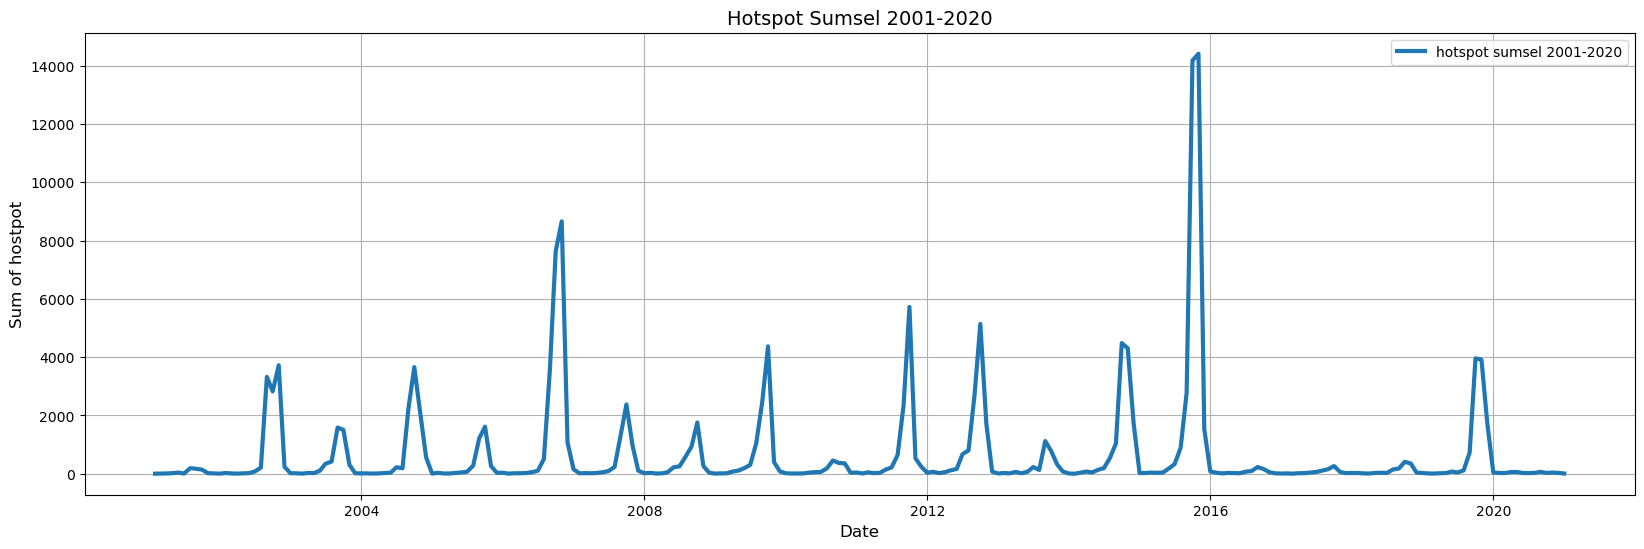

In [8]:
# make frame
fig, ax = plt.subplots(figsize = (20,6))

# make time series plot
ax.plot(dataset["acq_date"], dataset["hotspot"], color="tab:blue", label="hotspot sumsel 2001-2020", linewidth=3)

# make are labels
ax.set_title("Hotspot Sumsel 2001-2020", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Sum of hostpot", fontsize=12)
ax.legend(loc='best')
ax.grid(True)

# show plot time series
plt.show()

- Analysis ACF and PACF

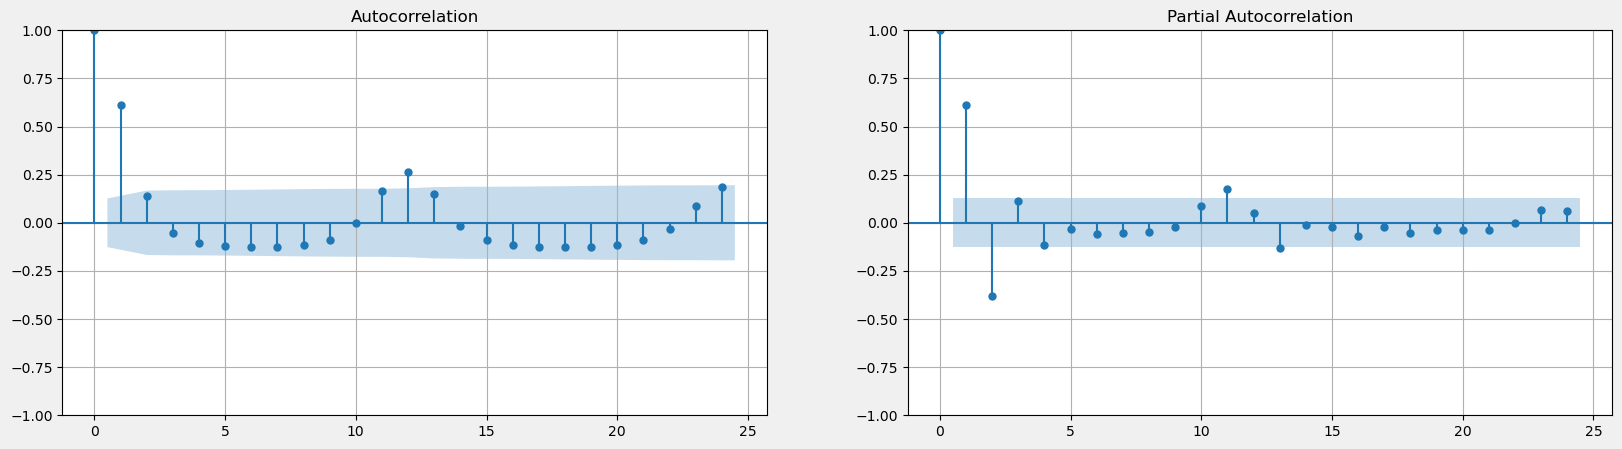

In [9]:
# make frame
fig, ax= plt.subplots(nrows=1, ncols=2, facecolor="#F0F0F0", figsize = (20,5))

# plot acf
plot_acf(dataset["hotspot"], lags=24, ax=ax[0])
ax[0].grid(True)

# plot pacf
plot_pacf(dataset["hotspot"],lags=24, ax=ax[1], method="yw")
ax[1].grid(True)

# show plot acf and pacf
plt.show()

### 4. Praproses Data

- feature selection

In [10]:
# set a feature selection
df_sumsel = dataset.filter(["hotspot"])

In [11]:
# convert dataframe to series
df_sumsel = df_sumsel.values

In [12]:
# show a dataset
np.round(df_sumsel[:5],7)

array([[ 3],
       [ 5],
       [10],
       [20],
       [39]], dtype=int64)

In [13]:
# view a dimension dataset
df_sumsel.shape

(240, 1)

- normalization data

In [14]:
# normalize data with max-min algorithm
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(np.array(df_sumsel).reshape(-1,1))

In [15]:
# show a dataset after normalize
np.round(scaled_data[:5],7)

array([[-0.9997225],
       [-0.999445 ],
       [-0.9987513],
       [-0.9973639],
       [-0.9947277]])

In [16]:
# view a dimension dataset after normalize
scaled_data.shape

(240, 1)

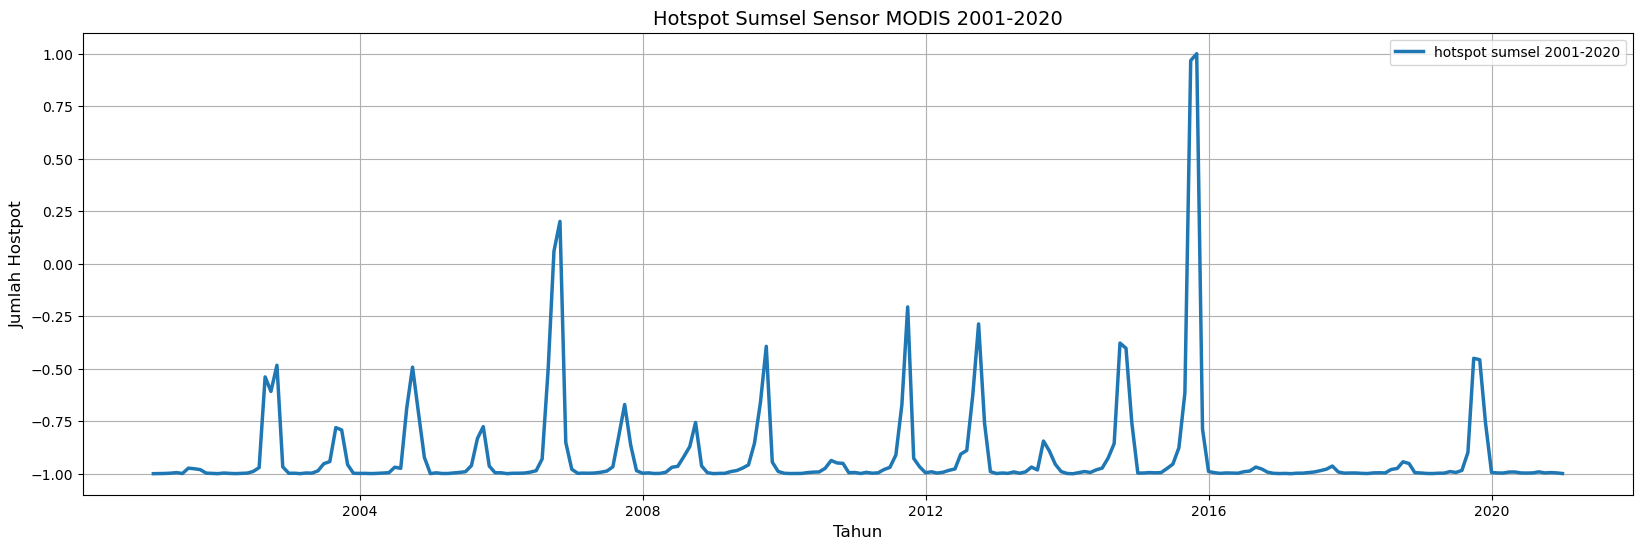

In [17]:
# make a frame
fig, ax = plt.subplots(figsize = (20,6))

# make a time series plot
ax.plot(dataset["acq_date"], scaled_data, color="tab:blue", label="hotspot sumsel 2001-2020", linewidth=2.5)

# make a labels
ax.set_title("Hotspot Sumsel Sensor MODIS 2001-2020", fontsize=14)
ax.set_xlabel("Tahun", fontsize=12)
ax.set_ylabel("Jumlah Hostpot", fontsize=12)
ax.legend(loc='best')
ax.grid(True)

# show plot time series
plt.show()

- set data train and data test

In [18]:
# set data train
train_size = int(len(scaled_data) * 0.8)

In [19]:
# set loc data train
train_data = scaled_data[0:train_size,:]

In [20]:
# show data train
np.round(train_data[:5],7)

array([[-0.9997225],
       [-0.999445 ],
       [-0.9987513],
       [-0.9973639],
       [-0.9947277]])

In [21]:
# view dimension of data train
train_data.shape

(192, 1)

In [22]:
# set data test
test_size = len(df_sumsel) - train_size

In [23]:
# set loc data train
test_data = scaled_data[train_size:len(df_sumsel),:]

In [24]:
# show data train
np.round(test_data[:5],7)

array([[-0.9984738],
       [-0.9997225],
       [-0.9975026],
       [-0.9973639],
       [-0.9944502]])

In [25]:
# view dimension of data train
test_data.shape

(48, 1)

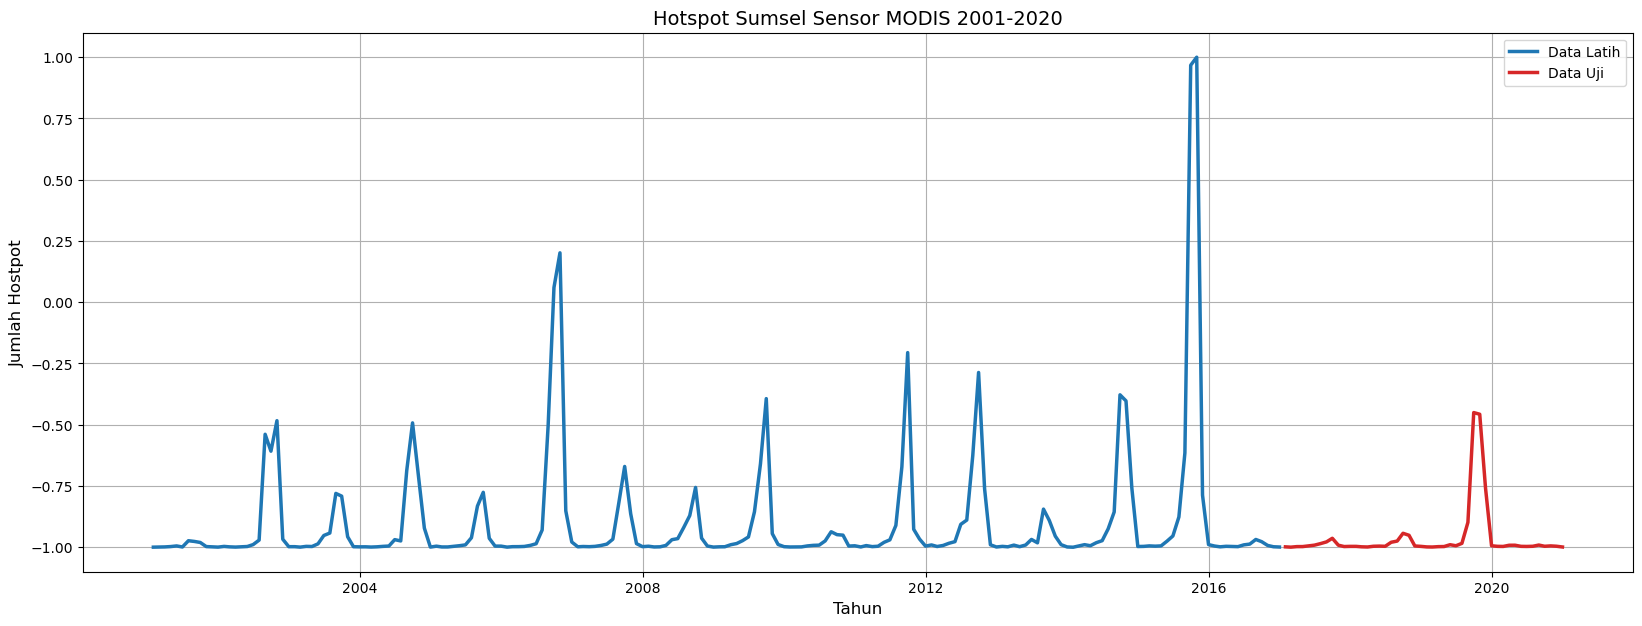

In [26]:
# make a frame
fig, ax = plt.subplots(figsize = (20,7))

# make a time series plot
ax.plot(dataset.iloc[0:train_size,0], train_data, color="tab:blue", label="Data Latih", linewidth=2.5)
ax.plot(dataset.iloc[train_size:len(scaled_data),0], test_data, color="tab:red", label="Data Uji", linewidth=2.5)

# make are labels
ax.set_title("Hotspot Sumsel Sensor MODIS 2001-2020", fontsize=14)
ax.set_xlabel("Tahun", fontsize=12)
ax.set_ylabel("Jumlah Hostpot", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

# show plot time series
plt.show()

### 5. Supervised Learning

In [27]:
# function for supervised learning
def create_dataset(dataset, look_back):
    
    # declare variable X and Y
    dataX = []
    dataY = []
    
    # for loop for create supervised learning
    for i in range(look_back, len(dataset)):
        
        # insert value X and Y 
        dataX.append(dataset[i-look_back:i, 0])
        dataY.append(dataset[i, 0])
        
    # return value X and Y
    return np.array(dataX), np.array(dataY)

- process supervised learning, with look back t-1 into X=t and Y=t+1

In [28]:
# set look back -1
look_back = 1

In [29]:
# set supervised learning for data train
x_train, y_train = create_dataset(train_data, look_back)

In [30]:
# view a dimension dataset after supervised learning
print(x_train.shape, y_train.shape)

(191, 1) (191,)


In [31]:
# set supervised learning for data test
x_test, y_test = create_dataset(test_data, look_back)

In [32]:
# view a dimension dataset after supervised learning
print(x_test.shape, y_test.shape)

(47, 1) (47,)


- Check data train, for result supervised learning

In [33]:
temp_trainX = pd.DataFrame(x_train, columns=['y train'])
temp_trainY = pd.DataFrame(y_train, columns=['x train'])

In [34]:
hasil_train = pd.concat([temp_trainX, temp_trainY], axis=1)
hasil_train.head()

,y train,x train
0,-0.999723,-0.999445
1,-0.999445,-0.998751
2,-0.998751,-0.997364
3,-0.997364,-0.994728
4,-0.994728,-0.999029


In [35]:
hasil_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y train  191 non-null    float64
 1   x train  191 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


- Check data test, for result supervised learning

In [36]:
temp_testX = pd.DataFrame(x_test, columns=['y test'])
temp_testY = pd.DataFrame(y_test, columns=['x test'])

In [37]:
hasil_test = pd.concat([temp_testX, temp_testY], axis=1)
hasil_test.head()

,y test,x test
0,-0.998474,-0.999723
1,-0.999723,-0.997503
2,-0.997503,-0.997364
3,-0.997364,-0.994450
4,-0.994450,-0.991537


In [38]:
hasil_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y test  47 non-null     float64
 1   x test  47 non-null     float64
dtypes: float64(2)
memory usage: 880.0 bytes


- reshape input to be [samples, time steps, features]

In [39]:
# reshape data train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [40]:
print(x_train.shape, y_train.shape)

(191, 1, 1) (191,)


In [41]:
# reshape data train
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [42]:
print(x_test.shape, y_test.shape)

(47, 1, 1) (47,)


### 6. Hyperparameter GridSearchCV LSTM-RNN

- library for hyperparameter

In [43]:
import itertools
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

- set models lstm-rnn

In [44]:
# function models lstm-rnn
def get_model(activation='tanh', optimizer='Adam', dropout_rate=0.00):
    tf.keras.backend.clear_session()
    
    # design network
    model = Sequential()
    
    # first LSTM-RNN layer with dropout regularisation
    model.add(LSTM(units=10, activation=activation, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    
    # The output layer
    model.add(Dense(1))
    
    # if optimizer == "adam":
    #     opt = Adam(learning_rate)
    # elif optimizer == "adamax":
    #     opt = Adamax(learning_rate)
    # elif optimizer == "rmsprop":
    #     opt = Adamax(learning_rate)
    # else:
    #     opt = SGD(learning_rate)
    
    # Compiling model the LSTM-RNN
    model.compile(
        optimizer=optimizer,
        loss="mae",
        metrics=[
            tf.keras.metrics.MeanAbsoluteError(),
            tf.keras.metrics.MeanSquaredError(),
            tf.keras.metrics.RootMeanSquaredError()
        ]
    )

    # return values
    return model;

Set parameter
<ul>
    <li>activation function = tanh, sigmoid, relu, selu, softplus, elu.</li>
    <li>optimizers = adam, adamax, rmsprop, sgd.</li>
    <li>droupout = 0.1, 0.2, 0.3, 0.4, 0.5</li>
    <li>batch size = 4, 8, 16, 32, 64</li>
    <li>epoch = 500, 1000, 1500, 2000</li>
</ul>

In [45]:
# set parameter activation
activation = ['tanh', 'sigmoid', 'relu', 'selu', 'elu', 'softplus']

In [46]:
# set parameter optimizer
optimizer = ['Adam', 'Adamax', 'RMSprop', 'SGD']

In [47]:
# set parameter dropout_rate
dropout_rate = [0.00, 0.05, 0.1, 0.15, 0.2, 0.25]

In [48]:
# set parameters batch sizes
batch_size = [2, 4, 8, 16, 32]

In [49]:
# set parameter epochs
epochs = [10]

In [50]:
# convert parameter to dictionary
param_grid = dict(
    model__activation=activation,
    model__optimizer=optimizer,
    model__dropout_rate=dropout_rate,
    batch_size=batch_size,
    epochs=epochs
)

In [60]:
param_grid

{'model__activation': ['tanh', 'sigmoid', 'relu', 'selu', 'elu', 'softplus'],
 'model__optimizer': ['Adam', 'Adamax', 'RMSprop', 'SGD'],
 'model__dropout_rate': [0.0, 0.05, 0.1, 0.15, 0.2, 0.25],
 'batch_size': [2, 4, 8, 16, 32],
 'epochs': [10]}

In [51]:
grid_model = KerasRegressor(model=get_model, verbose=1)

In [52]:
grid_search = GridSearchCV(estimator=grid_model, param_grid=param_grid, n_jobs=-1, cv=2)

In [53]:
grid_result = grid_search.fit(x_train, y_train)

Epoch 1/10
96/96 [==============================] - 3s 3ms/step - loss: 0.4889 - mean_absolute_error: 0.4889 - mean_squared_error: 0.2953 - root_mean_squared_error: 0.5434
Epoch 2/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2860
Epoch 3/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2674
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2811
Epoch 5/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2683
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_squared_error: 0.0684 - 

In [54]:
print(grid_result)

GridSearchCV(cv=2,
             estimator=KerasRegressor(model=<function get_model at 0x0000015466309040>),
             n_jobs=-1,
             param_grid={'batch_size': [2, 4, 8, 16, 32], 'epochs': [10],
                         'model__activation': ['tanh', 'sigmoid', 'relu',
                                               'selu', 'elu', 'softplus'],
                         'model__dropout_rate': [0.0, 0.05, 0.1, 0.15, 0.2,
                                                 0.25],
                         'model__optimizer': ['Adam', 'Adamax', 'RMSprop',
                                              'SGD']})


In [55]:
# summarize results
print("Best parameters: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))

Best parameters: 0.362929 using {'batch_size': 2, 'epochs': 10, 'model__activation': 'selu', 'model__dropout_rate': 0.0, 'model__optimizer': 'RMSprop'}



In [56]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.341071 (0.008956) with: {'batch_size': 2, 'epochs': 10, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__optimizer': 'Adam'}
0.281559 (0.019494) with: {'batch_size': 2, 'epochs': 10, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__optimizer': 'Adamax'}
0.337021 (0.027521) with: {'batch_size': 2, 'epochs': 10, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__optimizer': 'RMSprop'}
0.020712 (0.020747) with: {'batch_size': 2, 'epochs': 10, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__optimizer': 'SGD'}
0.351268 (0.027757) with: {'batch_size': 2, 'epochs': 10, 'model__activation': 'tanh', 'model__dropout_rate': 0.05, 'model__optimizer': 'Adam'}
0.266068 (0.006006) with: {'batch_size': 2, 'epochs': 10, 'model__activation': 'tanh', 'model__dropout_rate': 0.05, 'model__optimizer': 'Adamax'}
0.317067 (0.033758) with: {'batch_size': 2, 'epochs': 10, 'model__activation': 'tanh', 'model__dropout_rate': 0.05, 'model__optimizer'

In [62]:
len(params)

720

### 7. Evaluasi Model LSTM-RNN

In [57]:
# Set akhir waktu komputasi 
end = time.time()

In [58]:
# Proses menghitung waktu komputasi
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

In [59]:
# Hasil waktu komputasi
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:28:26.84
